1. What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?

Type I Error (False Positive)

Rejecting a true null hypothesis.
Probability = α (significance level).
Meaning: Concluding an effect exists when it actually doesn't.

Type II Error (False Negative)

Failing to reject a false null hypothesis.
Probability = β.
Meaning: Missing a real effect.

Impact on Decision-Making

Lower α → fewer false positives but more false negatives.

Lower β → fewer false negatives but more false positives.
Balance depends on the seriousness of errors (ex: medicine).

2. What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?

A P-value is the probability of observing results as extreme as the sample data assuming the null hypothesis is true.

Interpretation

p ≤ α → Reject H₀ (evidence against H₀)

p > α → Fail to reject H₀ (insufficient evidence)

P-value does not give the probability that the null hypothesis is true.

3. Explain the difference between a Z-test and a T-test, including when to use each.

- The Z-testUse when: You have lots of data ($n > 30$) AND you know the true variance of the entire population ($\sigma$).

- The T-testUse when: You have little data ($n < 30$) OR you do not know the population's variance (so you have to estimate it from your sample).

4. What is a confidence interval, and how does the margin of error influence its width and interpretation?

Confidence Interval (CI)

Range of values likely to contain the true population parameter.

Formula:
CI = sample mean ± margin of error

Margin of Error (ME)

ME = critical value × standard error

Effect on CI Width

Larger ME → wider interval → less precise

Smaller ME → narrower interval → more precise

ME increases when:

confidence level increases

sample size decreases

variability increases

5. Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?

Purpose

ANOVA tests whether means of 3 or more groups differ significantly.

Assumptions

Independence of observations

Normality of each group

Equal variances across groups (homogeneity)

How ANOVA Extends Hypothesis Testing

Instead of multiple t-tests (which increase Type I error), ANOVA compares all means simultaneously with a single test.

In [1]:
#6. Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.

import numpy as np
from statsmodels.stats.weightstats import ztest

# Sample dataset
data = np.array([45, 50, 55, 60, 52, 48, 49, 51])

# Hypothesized population mean
mu = 50

# Perform one-sample Z-test
z_stat, p_value = ztest(data, value=mu)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0: The sample mean is significantly different from 50.")
else:
    print("Fail to reject H0: No significant difference from 50.")


Z-statistic: 0.7702079842374077
P-value: 0.441176528496835
Fail to reject H0: No significant difference from 50.


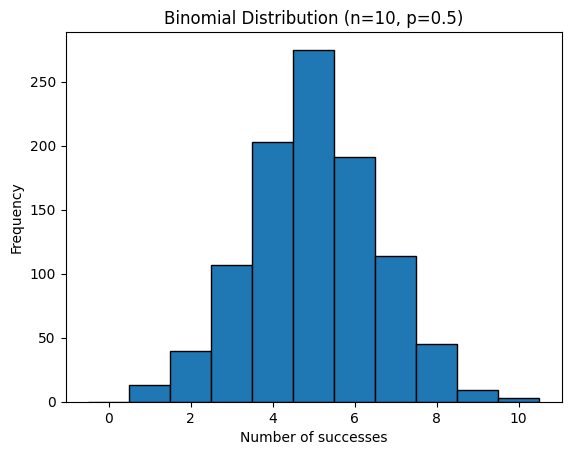

In [2]:
#7. Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.

import numpy as np
import matplotlib.pyplot as plt

n = 10
p = 0.5
sample_size = 1000

# Binomial random values
data = np.random.binomial(n, p, sample_size)

# Histogram
plt.hist(data, bins=np.arange(0,12)-0.5, edgecolor='black')
plt.xlabel("Number of successes")
plt.ylabel("Frequency")
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.show()


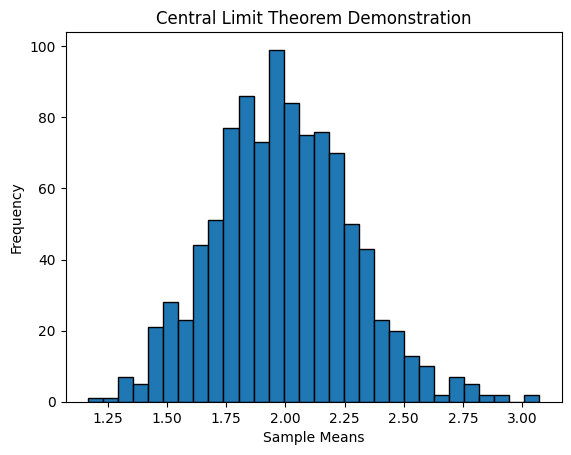

In [3]:
# 8. Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.

import numpy as np
import matplotlib.pyplot as plt

# Non-normal exponential distribution
population = np.random.exponential(scale=2, size=100000)

sample_means = []

for _ in range(1000):
    sample = np.random.choice(population, size=50)
    sample_means.append(np.mean(sample))

# Plot sample means
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title("Central Limit Theorem Demonstration")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()


95.0% Confidence Interval: (-0.3411498269062525, 0.3967650165889999)


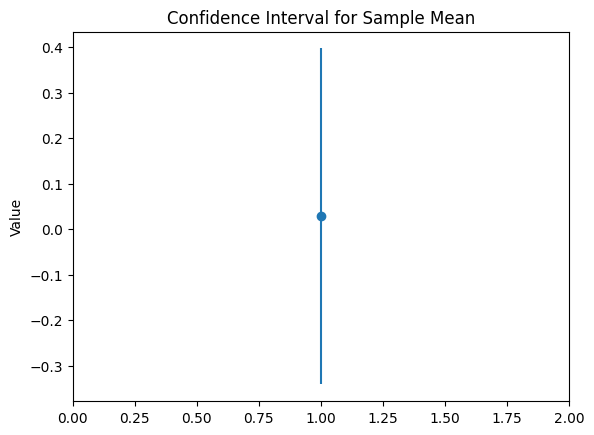

In [5]:
# 9. Write a Python function to calculate and visualize the confidence interval for a sample mean.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)

    se = std / np.sqrt(n)
    z = norm.ppf((1 + confidence) / 2)

    lower = mean - z * se
    upper = mean + z * se

    print(f"{confidence*100}% Confidence Interval: ({lower}, {upper})")

    # Plot error bar
    plt.errorbar(1, mean, yerr=[[mean-lower], [upper-mean]], fmt='o')
    plt.xlim(0, 2)
    plt.title("Confidence Interval for Sample Mean")
    plt.ylabel("Value")
    plt.show()

# Example usage
data = np.random.randn(30)
plot_confidence_interval(data)


In [6]:
# 10. Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

import numpy as np
from scipy.stats import chisquare

# Observed frequencies
observed = np.array([30, 50, 20])

# Expected frequencies
expected = np.array([33, 44, 23])

# Chi-square test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square statistic:", chi_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: Observed distribution differs from expected.")
else:
    print("Fail to reject H0: No significant difference.")


Chi-square statistic: 1.4822134387351777
P-value: 0.4765861763936037
Fail to reject H0: No significant difference.
